In [12]:
!unzip IA.zip

Archive:  IA.zip
   creating: imgs/
  inflating: imgs/3_02_04_01_cart.png  
  inflating: imgs/3_02_04_02_cart.png  
  inflating: imgs/3_02_04_03_cart.png  
  inflating: imgs/3_02_04_04_cart.png  
  inflating: imgs/3_02_04_05_cart.png  
  inflating: imgs/3_02_04_06_cart.png  
  inflating: imgs/3_04_01_01_cl.png  
  inflating: imgs/3_04_01_02_cl.png  
  inflating: imgs/3_04_01_03_cl.png  
  inflating: IA_para_todos_2.ipynb   
   creating: data/
  inflating: data/DS_3Clusters_999Puntos.txt  
  inflating: data/Mall_Customers.csv  
  inflating: data/titanic.csv        


# IA PARA TODOS clase 2: Aprendizaje No Supervisado y Supervisado



* En este Notebook vamos a ver el Algoritmo del ***K-Means***, que es un ***Algoritmo de Aprendizaje no Supervisado para Clustering***. Vamos a ***resolver un problema de Clusterización usando*** la implementación de este Algoritmo de Aprendizaje con la ***librería de scikit-learn***.

* Luego veremos un problema de **aprendizaje supervisado** que resolveremos con **árboles de decisión**.

<br>

#### **Índice**

[1. Aprendizaje No supervisado: Clustering](#1.)

* [1.1 K-Means](#1.1)

    * [1.1.1 Selección del Número óptimo de Clusters](#1.1.1)

    * [1.1.2 Ejemplo Clustering con K-means: Segmentación de Clientes en Centros comerciales](#1.1.2)

[2. Aprendizaje Supervisado](#2.)
    
* [2.1 Árboles de Decisión para la Clasificación](#2.1)

* [2.2 Ejemplo clasificación con árboles:Titanic](#2.2)

<br>
<br>

<hr>


## <a name="1.">1. Aprendizaje No supervisado: Clustering</a>


* El **Clustering** es una tarea; dentro del **aprendizaje NO SUPERVISADO**, que consiste en **agrupar un conjunto de objetos (no etiquetados) en subconjuntos de objetos llamados Clusters**.


* Cada Cluster está formado por una colección de objetos que son similares (o se consideran similares) entre sí, pero que son distintos respecto a los objetos de otros Clusters.


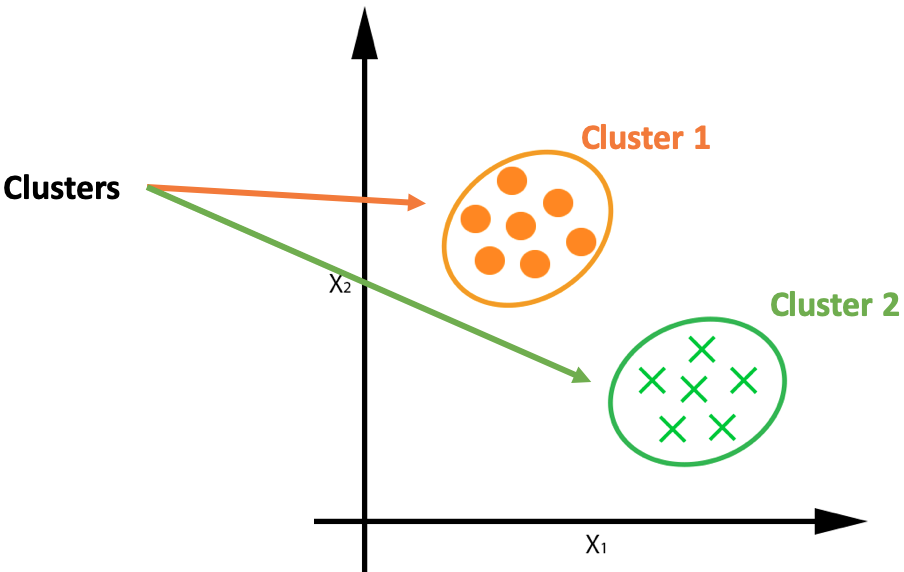

In [5]:
from IPython.display import Image, display
display(Image('./imgs/3_04_01_01_cl.png', width=450))


* Para el Clustering, solo disponemos de un conjunto de datos de entrada (aprendizaje NO SUPERVISADO), sobre los que debemos obtener información sobre la estructura del dominio de salida, que es una información de la cual no se dispone.


* En el Clustering definimos:

    + **Cluster**: Conjunto de objetos que son similares entre sí.
    + **Clustering**: Tarea de dividir un conjunto de objetos en subconjuntos de objetos (Clusters) similares entre sí.




### <a name="1.1">1.1. K-Means</a>

* El K-Means es un **método de Clustering** que separa ‘K’ grupos de objetos (clusters).

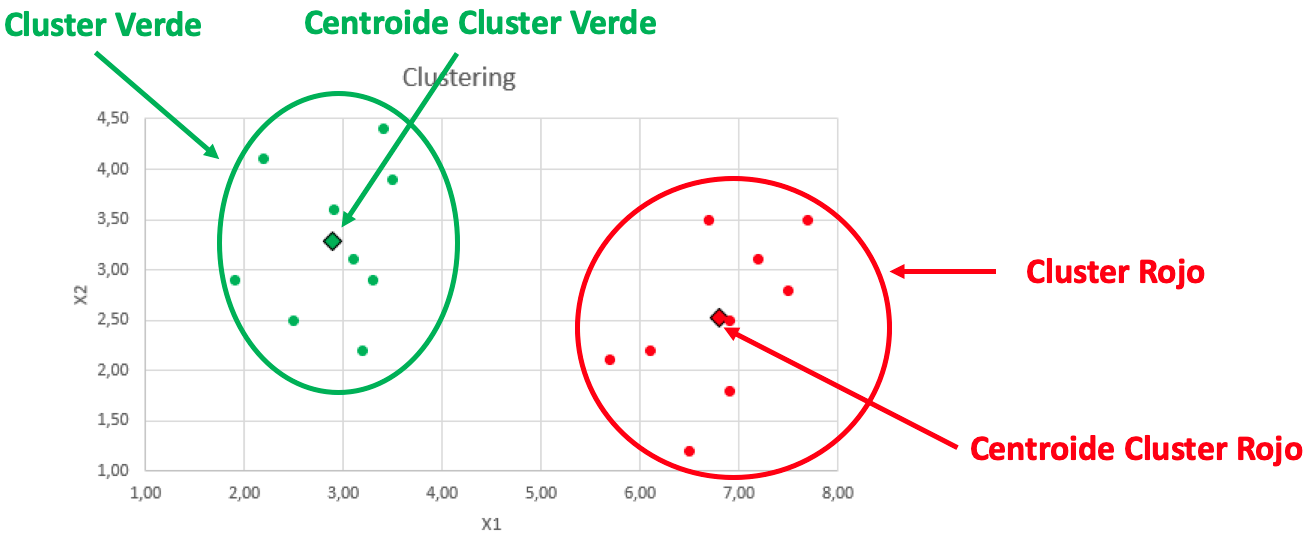

In [6]:
display(Image('./imgs/3_04_01_02_cl.png', width=700))


* Se deja aquí un [link](https://www.youtube.com/watch?v=4b5d3muPQmA&pp=ygUTaG93IGRvZXMga21lYW4gd29yaw%3D%3D) en caso de que se quiera profundizar cómo funciona K-means.


#### <a name="1.1.1">1.1.1 Selección del Número óptimo de Clusters</a>


* Uno de los **problemas** que nos encontramos a la hora de aplicar alguno de los métodos de Clustering es el de **seleccionar el número de Clusters**.


* No existe un criterio objetivo ni ampliamente válido para la elección de un número óptimo de Clusters; pero tenemos que tener en cuenta, que una mala elección de los mismos puede dar lugar a realizar agrupaciones de datos muy heterogéneos (pocos Clusters); o datos, que siendo muy similares unos a otros los agrupemos en Clusters diferentes (muchos Clusters).


* Una de las técnicas más utilizadas para la selección del número de cluster es el ***“Método del codo” (Elbow Method)***.


* A parte del método del codo, existen otras técnicas para la selección del número óptimo de Clusters como:
    + Dendrogramas
  
<br>



#### **Elbow Method**


* Veamos cual sería el número óptimo de clusters para siguiente dataset que tiene dos variables: X1 y X2.


* Para seleccionar el número optimo de clusters vamos a generar 10 modelos que tendrán de 1 a 10 clusters ya vamos a medir lo que K-means llama **inercia** para cada uno de esos modelos.

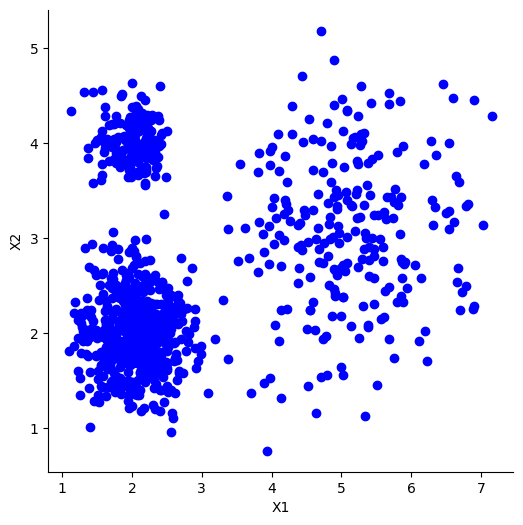

In [25]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
%matplotlib inline

url_puntos = 'https://raw.githubusercontent.com/datasciencedojo/datasets/master/titanic.csv'
X = pd.read_csv(url_puntos, delimiter='::', header=None, engine='python')
# Pintamos los elementos
plt.figure(figsize=(6, 6))
plt.scatter(X[0], X[1], color='b', marker='o')  # Notice X[:, 0] and X[:, 1] instead of X[0] and X[1]
plt.xlabel('X1')
plt.ylabel('X2')

# Remove top and right spines
ax = plt.gca()  # Get the current axis
ax.spines['top'].set_visible(False)
ax.spines['right'].set_visible(False)

plt.show()

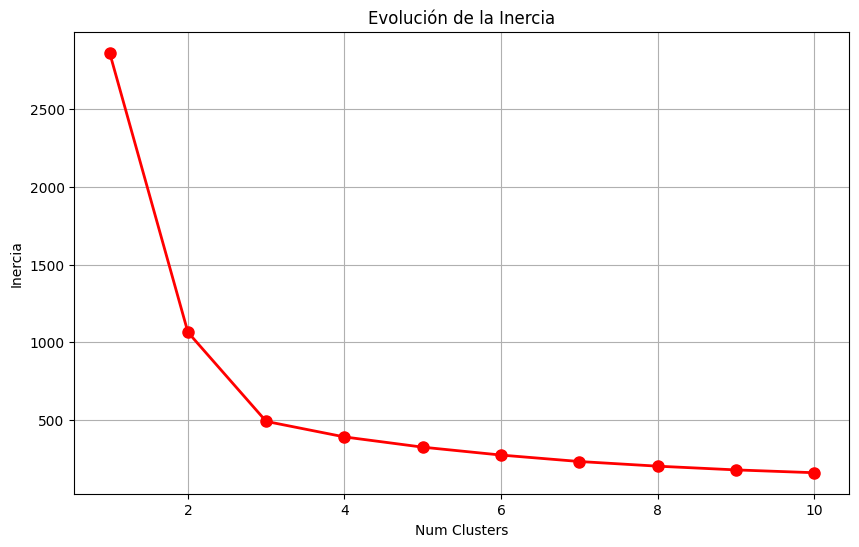

In [26]:
from sklearn.cluster import KMeans
import seaborn as sns
import warnings
warnings.filterwarnings("ignore")

num_modelos = 10

inercia_clusters = list()
for i in range(1, num_modelos + 1, 1):

    # Creamos un objeto KMeans
    kmeans = KMeans(n_clusters=i, max_iter=30, init='random')

    # Ajustamos el modelo
    kmeans.fit(X)

    # Obtenemos su inercia
    inercia = kmeans.inertia_
    inercia_clusters.append([i, inercia])

x, y = zip(*[inercia for inercia in inercia_clusters])
fig, ax =  plt.subplots(figsize=(10, 6))
ax.plot(x, y, 'ro-', markersize=8, lw=2)
ax.grid(True)
ax.set_title('Evolución de la Inercia')
ax.set_xlabel('Num Clusters')
ax.set_ylabel('Inercia')
plt.show()

* Se puede ver en la gráfica de arriba cómo hay un cambio brusco de pendiente a partir del cluster número 3. Esto quiere decir que el número óptimo de clusters para este dataset es 3 a priori.


#### <a name="1.1.2">1.1.2 Ejemplo Clustering con K-means: Segmentación de Clientes en Centros comerciales</a>


* En este punto vamos a resolver un problema de ***Clusterización usando la librería de Scikit-Learn***, que consistirá en ***perfilar a los clientes*** que compran en un centro comercial.


* Para ello disponemos de la siguiente información de los clientes:

    1. ***Gender***: Male|Female
    2. ***Age***: Edad del cliente
    3. ***Annual_Income***: Ingresos anuales del cliente (por miles de dolares)
    4. ***Spending_Score***: Una valoración que va de 0 a 100 en función del número de compras y dinero que gasta el cliente.


* El objetivo de este ejemplo es el de ***agrupar (Clusterizar) a los clientes y sacar el perfíl de estos grupos***, para que posteriormente a clientes de ese perfíl se le puedan aplicar las acciones comerciales correspondientes.


##### **Carga de datos**


* El primer paso que vamos a realizar es el de cargar los datos que los tenemos en el siguiente fichero:
    - ***DataSet***: "./data/Mall_Customers.csv"


* Para ello ***leeremos el csv con pandas*** (pasandolo a un dataframe), teniendo las siguientes columnas:
    - ***CustomerID***
    - ***Gender***
    - ***Age***
    - ***Annual_Income***
    - ***Spending_Score***

In [28]:
url_mall_customers = 'https://raw.githubusercontent.com/JCOQUE/ia_para_todos/master/Mall_Customers.csv'

df = pd.read_csv(url_mall_customers)
df.sample(5)

,CustomerID,Gender,Age,Annual_Income,Spending_Score
43,44,Female,31,39,61
112,113,Female,38,64,42
107,108,Male,54,63,46
86,87,Female,55,57,58
164,165,Male,50,85,26



##### Cambio de estructura de datos a numpy
    
* Vamos a pasar los datos que nos interesan de los clientes a un array de numpy para que nos sirva como entrada al algoritmo de aprendizaje.


* Para este ejercicio nos vamos a quedar con las variables:

    - ***Age***
    - ***Annual_Income***
    - ***Spending_Score***


In [30]:
X = df[['Age', 'Annual_Income', 'Spending_Score']].values


##### **Selección del Número óptimo de Clusters**
    
    
* Vamos a ver cual sería el número óptimo de Clusters con el método del codo; es decir, representando la inercia por el número de Clusters seleccionados y viendo donde se produce un cambio busco de tendencia.

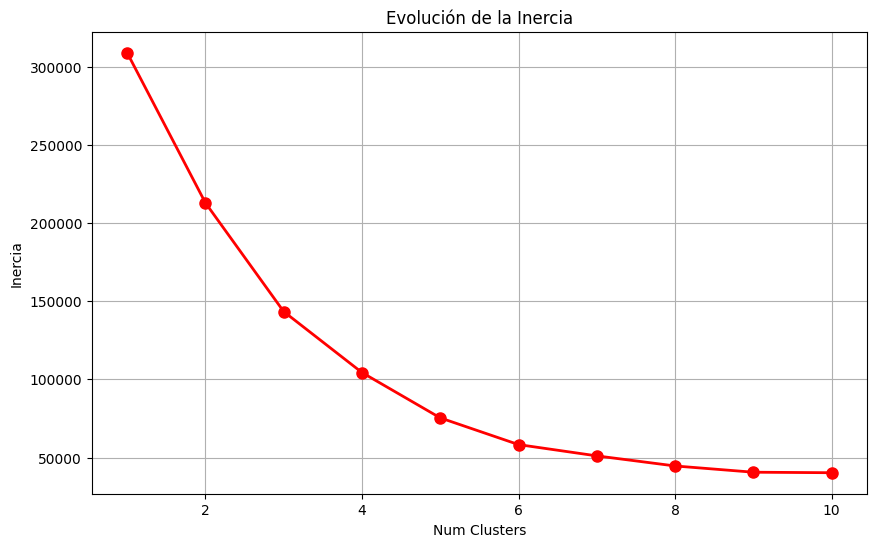

In [31]:
num_modelos = 10

inercia_clusters = list()
for i in range(1, num_modelos + 1, 1):

    # Creamos un objeto KMeans
    kmeans = KMeans(n_clusters=i, max_iter=30, init='random')

    # Ajustamos el modelo
    kmeans.fit(X)

    # Obtenemos su inercia
    inercia = kmeans.inertia_
    inercia_clusters.append([i, inercia])


x, y = zip(*[inercia for inercia in inercia_clusters])
fig, ax =  plt.subplots(figsize=(10, 6))
ax.plot(x, y, 'ro-', markersize=8, lw=2)
ax.grid(True)
ax.set_title('Evolución de la Inercia')
ax.set_xlabel('Num Clusters')
ax.set_ylabel('Inercia')
plt.show()


* Con los resultados obtenidos cuesta ver donde hay un cambio busco de tendencia si son para 4, 5 o 6 Clusters.


##### **Creacción del modelo y ajuste**
    
    
* Para crear el modelo vamos a seleccionar 5 Clusters.

In [32]:
# Creamos un objeto de la clase "KMeans()"
np.random.seed(7)
kmeans = KMeans(n_clusters=5, max_iter=50, init="random")

# Ajustamos el modelo
kmeans.fit(X)

KMeans(init='random', max_iter=50, n_clusters=5)


##### **Obtención del modelo (hipótesis)**


* Tras ajustar el modelo podemos obtener los centroides que representaran el valor medio de cada variable en cada Cluster.

In [33]:
# Valores de los centroides
centroides = kmeans.cluster_centers_
df_centroides = pd.DataFrame(centroides,
                             columns=['Age', 'Annual_Income', 'Spending_Score'],
                             index=['Cluster {}'.format(index+1) for index, elem in enumerate(centroides)])
df_centroides

,Age,Annual_Income,Spending_Score
Cluster 1,32.692308,86.538462,82.128205
Cluster 2,40.666667,87.750000,17.583333
Cluster 3,43.088608,55.291139,49.569620
Cluster 4,25.521739,26.304348,78.565217
Cluster 5,45.217391,26.304348,20.913043



##### **Conclusiones: Interpretación de los resultados**
    

* Con los resultados obtenidos podemos concluir:
<span></span><br><br>
    - ***Cluster 1***: Clientes más ***jóvenes*** (25 años de media) con ***ingresos bajos*** (25,7K) y un ***Scoring de compra Alto*** (79%).
<span></span><br><br>
    - ***Cluster 2***: Clientes de ***edad media*** (32,7 años) con ***altos ingresos*** (86,5K) y y un ***Scoring de compra Muy Alto*** (82%).
<span></span><br><br>
    - ***Cluster 3***: Clientes de ***edad media-alta*** (40,3 años) con ***altos ingresos*** (86,5K) y y un ***Scoring de compra Muy Bajo*** (18%).
<span></span><br><br>
    - ***Cluster 4***: Clientes de ***edad alta*** (43,1 años) con ***ingresos medios*** (54,8K) y y un ***Scoring de compra Medio*** (49,8%).
<span></span><br><br>
    - ***Cluster 5***: Clientes con la ***edad más alta*** (45,2 años) con ***ingresos bajos*** (26,3K) y y un ***Scoring de compra Bajo*** (20,9%).
<span></span><br><br>
    
* A modo de resumen podemos ver las distribuciones de cada uno de los Clusters por variable:

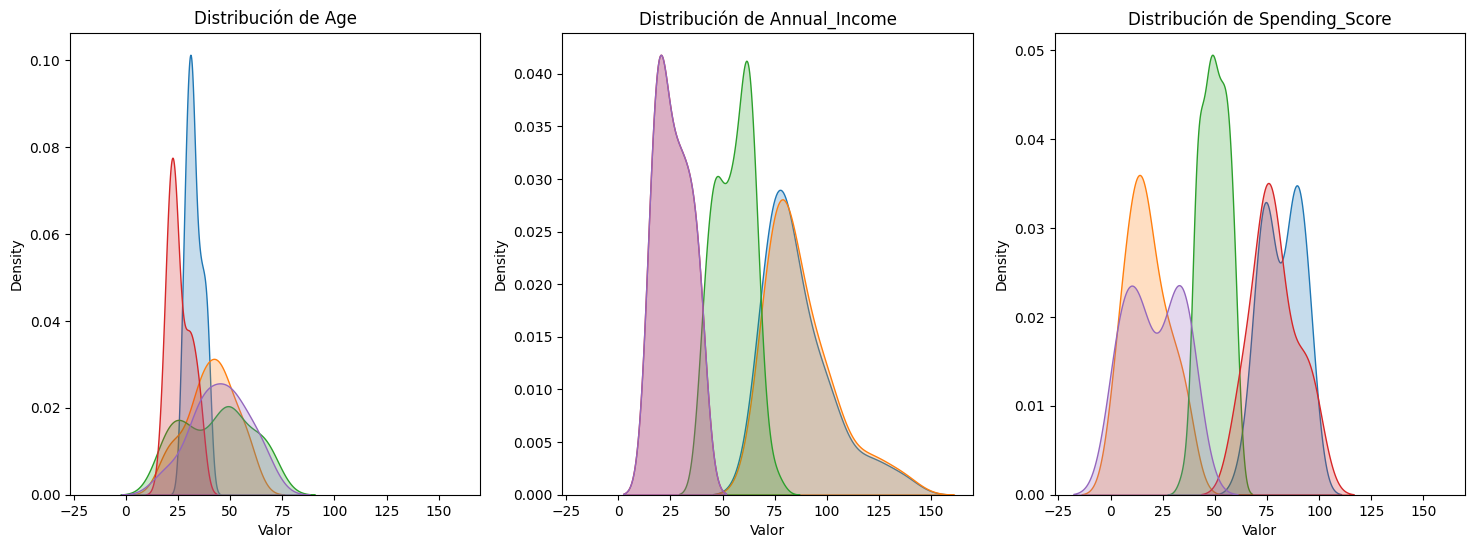

In [34]:
# Obtenemos las etiqueta del cluster a la que se asigna cada elemento
labels = kmeans.labels_


# Añadimos una nueva columna en el DataFrame para indicar la etiqueta de cada elemento
df['label'] = labels
df['label'] = df['label'].apply(lambda x: 'Cluster {}'.format(x+1))


# Dibujamos las distribuciones de las 4 variables para cada uno de los Clusters
f, axes = plt.subplots(1, 3, figsize=(18, 6), sharex=True)
plt_position = [axes[0], axes[1], axes[2]]
for index, col in enumerate(df[['Age', 'Annual_Income', 'Spending_Score']]):
    for i in np.sort(df['label'].unique()):
        df_plot = df[df['label'] == i][['label', col]]
        sns.kdeplot(df_plot[col], shade=True, label=i, ax=plt_position[index])
    plt_position[index].title.set_text('Distribución de {}'.format(col))
    plt_position[index].set_xlabel('Valor')

<hr>

## <a name="2.">2. Aprendizaje Supervisado</a>
A diferencia del aprendizaje no supervisado en el no se tienen etiqueta de los datos, **el aprendizaje supervisado define por el uso de conjuntos de <u>datos etiquetados</u> para entrenaralgoritmos que <u>clasifican</u> los datos o <u>predicen</u> los resultados con precisión**.

### <a name = '2.1'> 2.1 Árboles de Decisión para la Clasificación </a>


* Los ***Árboles de Decisión son un Algoritmo de Aprendizaje que tiene como objetivo generar un gráfo de decisión*** que permita predecir la variable objetivo en función del valor de las variables de entrada.


* Un ejemplo de árbol de decisión para la concesión de un credito bancario pordría ser el siguiente:

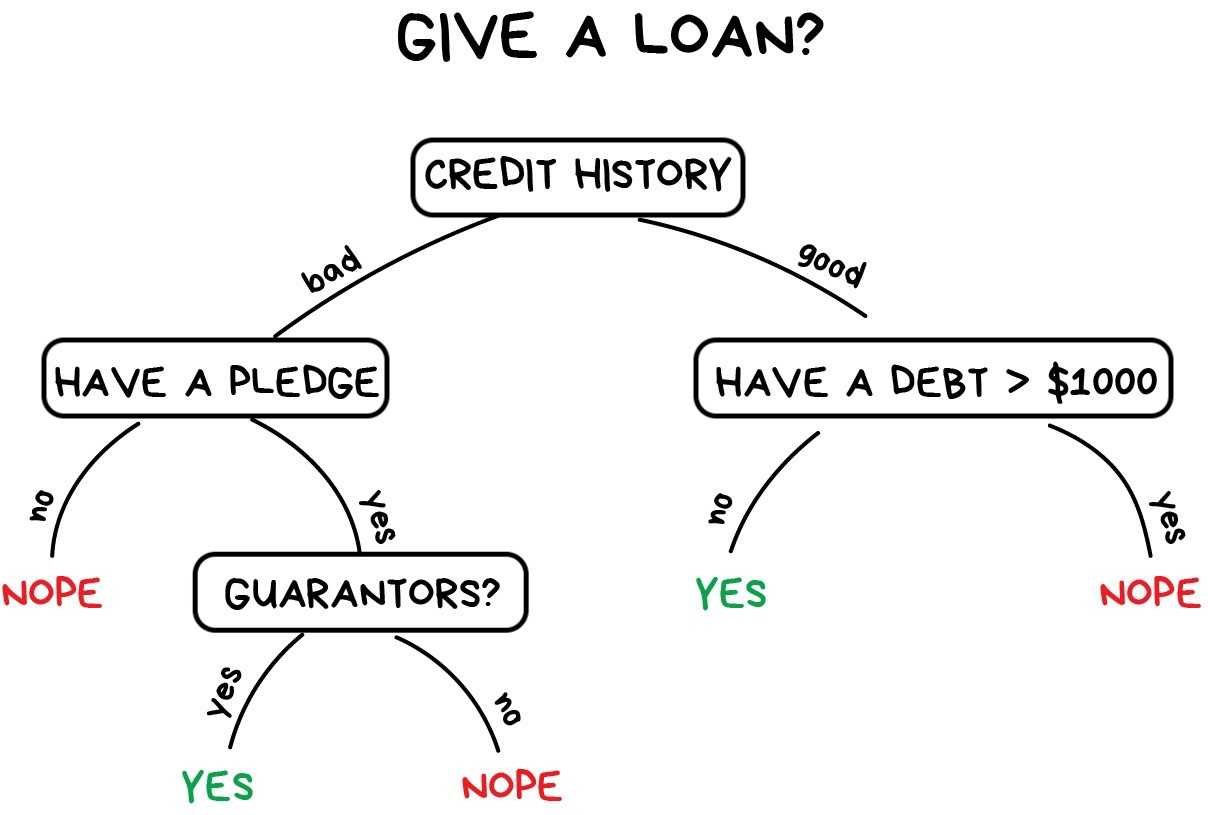

In [35]:
display(Image('./imgs/3_02_04_06_cart.png', width=500))


* Cada nodo del gráfo define una condición en función del valor de una variable y si cumple o no cumple la condición las aristas no llevaran a otro nodo condicional o a la solución final.


* Por tanto el ***objetivo de los Árboles de Decisión es el de aprender a construir estos grafos*** (o árboles).


* A los ***Árboles de Decisión se les conoce como CART (Classification And Regression Trees)*** ya que estos permiten resolver tanto problemas de clasificación como problemas de regresión.


* Veamos a continuación como se construiría un Arbol de Decisión para clasificar los siguientes puntos rojos y verdes:

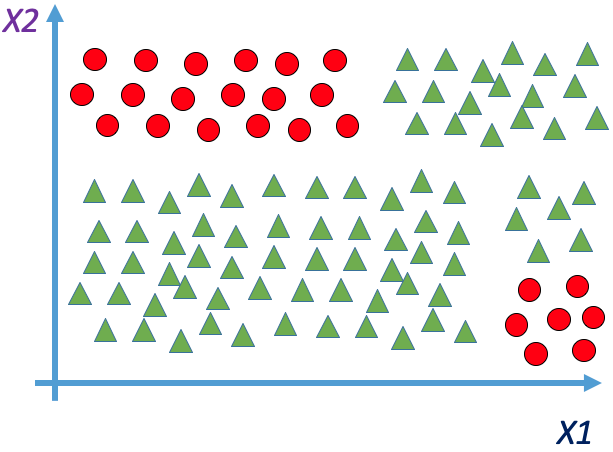

In [36]:
display(Image('./imgs/3_02_04_01_cart.png', width=400))

* El algoritmo lo que hace es ir diviendo el conjunto de datos en "trozos" en función del valor de una variable. Por ejemplo como primer paso podemos dividir nuestro Dataset en dos partes; una cuyos valores de `X2` sean mayores a 20 y los otros menores a 20. De esta manera ya hemos construido nuestro primer nodo del árbol de decisión:

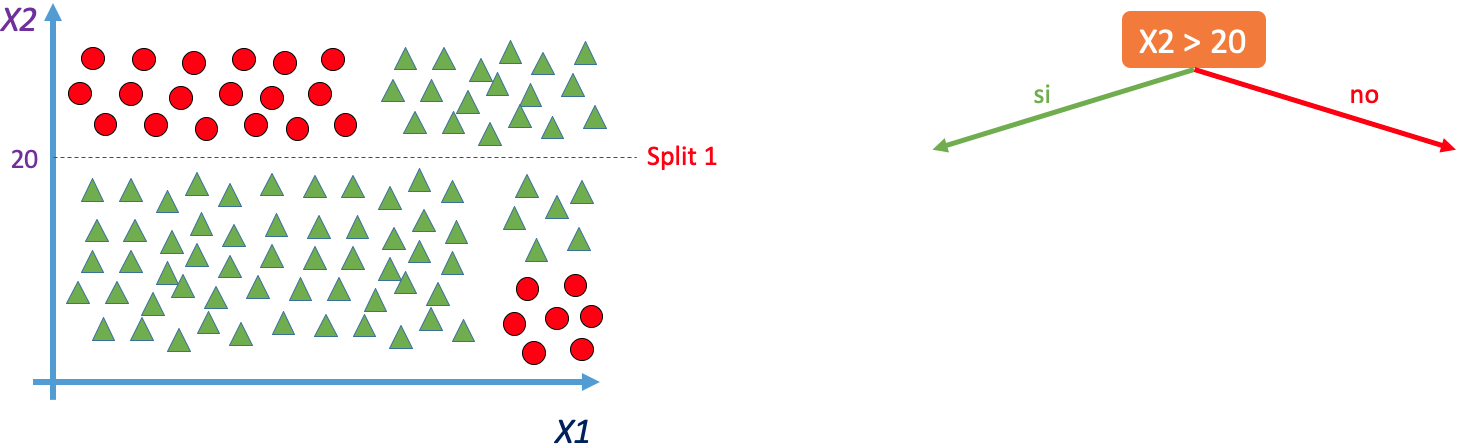

In [37]:
display(Image('./imgs/3_02_04_02_cart.png', width=700))

* En segundo lugar, podemos dividir en dos partes aquellos elementos con valores de `X2` mayores a 20; por tanto dividimos esta sección en función de la condición de que `X1` sea mayor o menor a 28. Con esta condición ya podemos clasificar los puntos verdes y rojos que cumplen que `X2` es mayor a 20 y que `X1` es mayor o menor que 28 respectivamente.

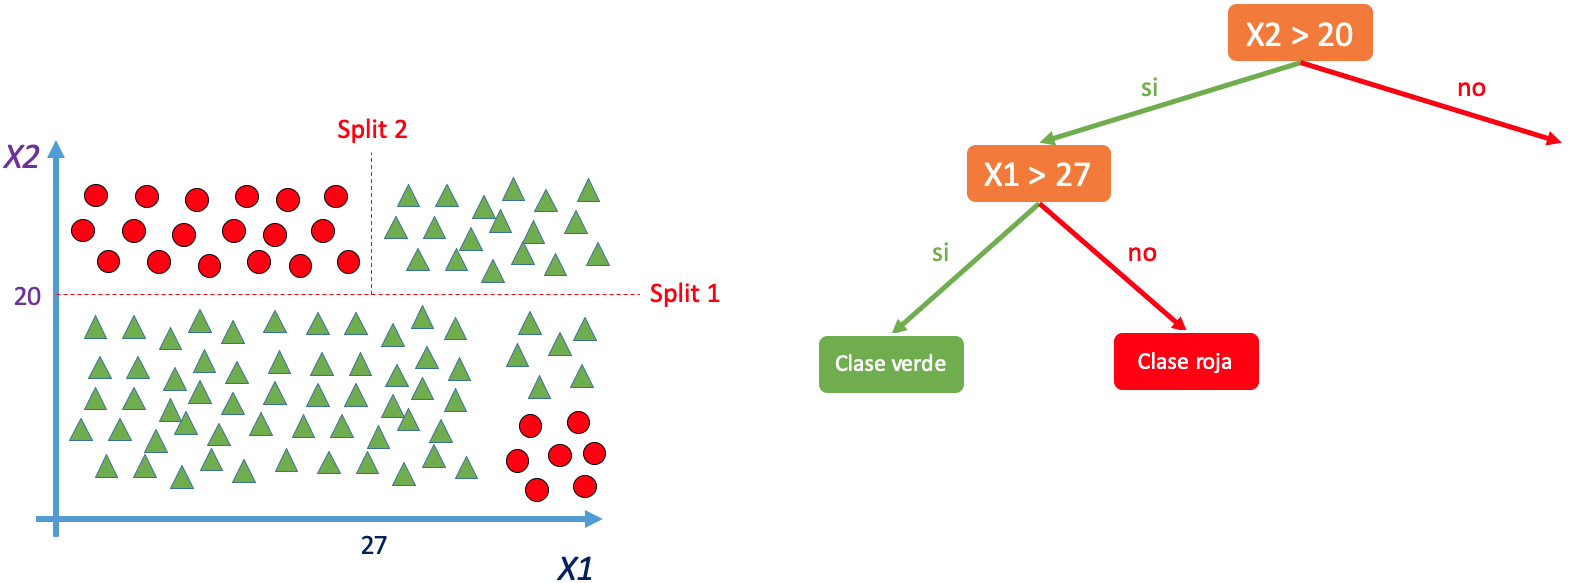

In [38]:
display(Image('./imgs/3_02_04_03_cart.png', width=700))

* De esta manera seguimos dividiendo los datos según una serie de condiciones hasta conseguir la clasificación final:

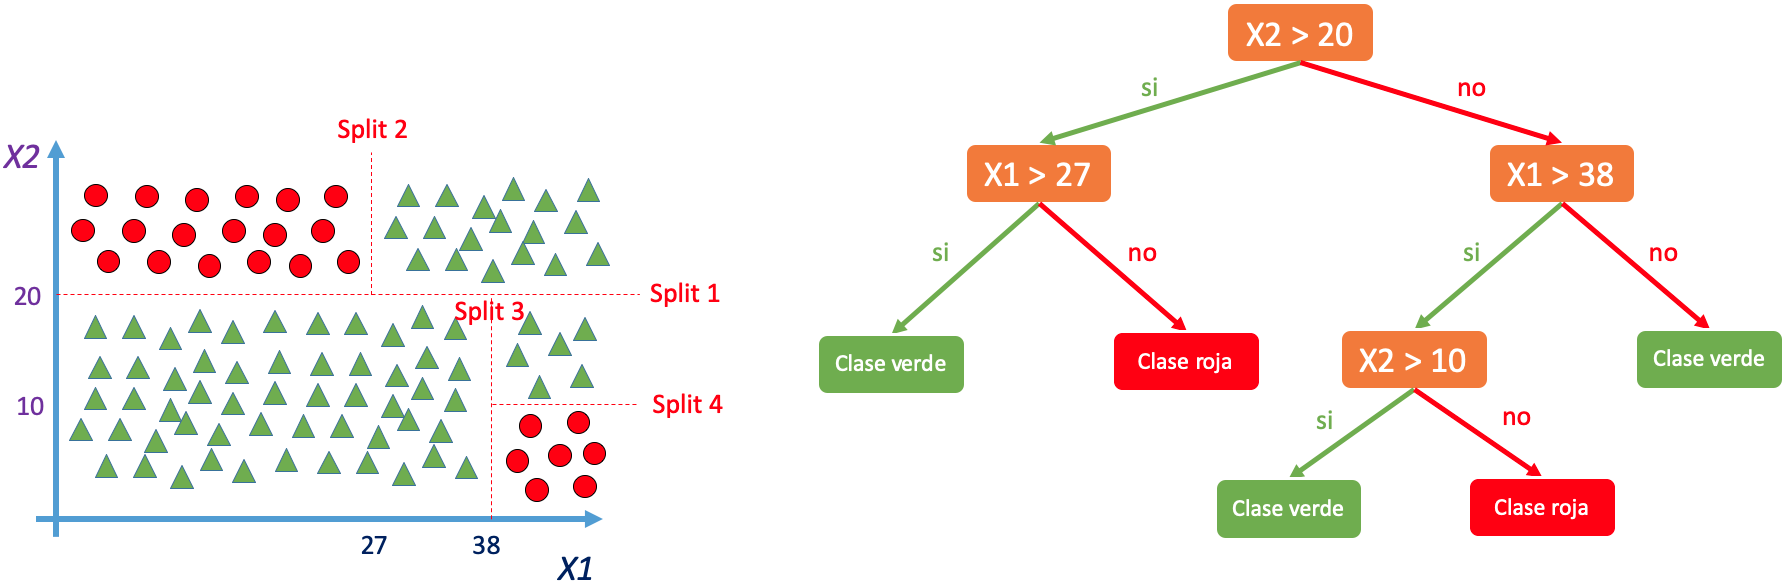

In [39]:
display(Image('./imgs/3_02_04_05_cart.png', width=700))

<br>
<br>

#### **¿Cómo se construyen los Árboles de Decisión?**


* El Algoritmo de Aprendizje utiliza un **algoritmo voraz** para construir el Árbol de decisión:

> **Definición algoritmo voraz**: Los algoritmos voraces son un tipo de algoritmos usados para resolver problemas de optimización combinatoria y estos problemas los resuelven los resuelven eligiendo en cada paso la opción óptima (sin importar los siguientes pasos) con la esperanza de llegar a una solución general óptima.


* Como medida de calidad de la división o decisión tomada, se usan dos medidas conocidas como `Gini` y `Entropia`.

    * Para no entrar demasiado en teoría, se puede ver a Gini y Entropía distintas maneras de llegar a encontrar aquellas variables más decisivas para la clasificación para situarlas lo más alto en el árbol. Esto es, las decisiones que vaya tomando el árbol de decisión, se quiere que cuanto antes vaya segmentando mejor las ramas mejor.

    * **Un ejemplo**: si se quiere clasificar si una persona se va a comprar un ferrari o no, y se tienen los datos del dinero que tiene en el banco, su nacionalidad y si le gustan los coches; cabe pensar que es mucho más lógico primero segmentar en si tiene suficiente dinero, luego en si le gustan los coches y luego la nacionalidad. El objetivo de un árbol es encontrar estas variables que son más significativas para clasificación -o predicción- y situarlas respectivamente en lo más alto del árbol.

#### <a id = "2.2">2.2  Ejemplo clasificación con árboles: Titanic</a>

Para ver mejor en acción a este algoritmo, se va a utilizar el dataset de la clase 1 -Titanic- para tratar de clasificar si una persona de determinadas características sobrevivió o no.

In [40]:
url_titanic = 'https://raw.githubusercontent.com/datasciencedojo/datasets/master/titanic.csv'
df = pd.read_csv(url_titanic)
df.sample(5)

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
643,644,1,3,"Foo, Mr. Choong",male,NaN,0,0,1601,56.4958,NaN,S
431,432,1,3,"Thorneycroft, Mrs. Percival (Florence Kate White)",female,NaN,1,0,376564,16.1000,NaN,S
318,319,1,1,"Wick, Miss. Mary Natalie",female,31.0,0,2,36928,164.8667,C7,S
140,141,0,3,"Boulos, Mrs. Joseph (Sultana)",female,NaN,0,2,2678,15.2458,NaN,C
625,626,0,1,"Sutton, Mr. Frederick",male,61.0,0,0,36963,32.3208,D50,S


#### **Preprocesamiento básico**

In [41]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 12 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   PassengerId  891 non-null    int64  
 1   Survived     891 non-null    int64  
 2   Pclass       891 non-null    int64  
 3   Name         891 non-null    object 
 4   Sex          891 non-null    object 
 5   Age          714 non-null    float64
 6   SibSp        891 non-null    int64  
 7   Parch        891 non-null    int64  
 8   Ticket       891 non-null    object 
 9   Fare         891 non-null    float64
 10  Cabin        204 non-null    object 
 11  Embarked     889 non-null    object 
dtypes: float64(2), int64(5), object(5)
memory usage: 83.7+ KB


In [42]:
df.dropna(subset=['Embarked'], inplace=True)

In [43]:
df['Embarked'].value_counts()

,count
Embarked,
S,644
C,168
Q,77


In [44]:
df['Sex'].value_counts()

,count
Sex,
male,577
female,312


In [45]:
embarked_mapping = {'S':0, 'C': 1, 'Q': 2}
df['Embarked'] = df['Embarked'].apply(lambda x: embarked_mapping[x])
df['Sex'] = df['Sex'].apply(lambda x: 0 if x =='male' else 1)
df.sample(5)

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
739,740,0,3,"Nankoff, Mr. Minko",0,NaN,0,0,349218,7.8958,NaN,0
432,433,1,2,"Louch, Mrs. Charles Alexander (Alice Adelaide ...",1,42.0,1,0,SC/AH 3085,26.0000,NaN,0
721,722,0,3,"Jensen, Mr. Svend Lauritz",0,17.0,1,0,350048,7.0542,NaN,0
729,730,0,3,"Ilmakangas, Miss. Pieta Sofia",1,25.0,1,0,STON/O2. 3101271,7.9250,NaN,0
170,171,0,1,"Van der hoef, Mr. Wyckoff",0,61.0,0,0,111240,33.5000,B19,0


##### Cambio de estructura de datos a numpy y Particionado de datos en Entrenamiento y Test

In [46]:
from sklearn.model_selection import train_test_split

# Paso a Numpy
x_features = ['PassengerId', 'Pclass', 'Sex', 'Age',
              'SibSp', 'Parch', 'Fare', 'Embarked']

X = df[x_features].values
y = df['Survived'].values

# División de datos en entrenamiento y test
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=0)

In [47]:
from sklearn.tree import DecisionTreeClassifier

modelos = {'DT Gini Depth 3': DecisionTreeClassifier(criterion='gini', max_depth=3),
           'DT Entropy Depth 5': DecisionTreeClassifier(criterion='entropy', max_depth=5)}


# Ajustamos los modelos
for k, v in modelos.items():
    print ('CREANDO MODELO: {clas}'.format(clas=k))
    v.fit(X_train, y_train)

CREANDO MODELO: DT Gini Depth 3
CREANDO MODELO: DT Entropy Depth 5



##### **Visualización de los Árboles obtenidos**

* Una vez creados los arboles de decisión, podemos visualizarlos para ver que decisiones toman en función del valor de las variables.


* A modo de ejemplo vamos a mostrar solo los árboles creados con el criterio de división Gini.

In [48]:
import collections
import pydotplus
from IPython.display import Image
from sklearn.tree import export_graphviz


def graph_tree(model, feature_names, class_names):
    """
    Función que crea el gráfico del arbol de decisión
    model: modelo del árbol de decisión
    feature_names: lista con el nombre de las variables de entrada
    class_names: lista con el nombre de las clases
    """
    dot_data = export_graphviz(model, feature_names=feature_names, class_names=class_names,
                               out_file=None, filled=True, rounded=True)

    graph = pydotplus.graph_from_dot_data(dot_data)

    edges = collections.defaultdict(list)

    for edge in graph.get_edge_list():
        edges[edge.get_source()].append(int(edge.get_destination()))

    for edge in edges:
        edges[edge].sort()
        for i in range(2):
            dest = graph.get_node(str(edges[edge][i]))[0]

    return graph


Arbol de Decisión Gini Depth 3


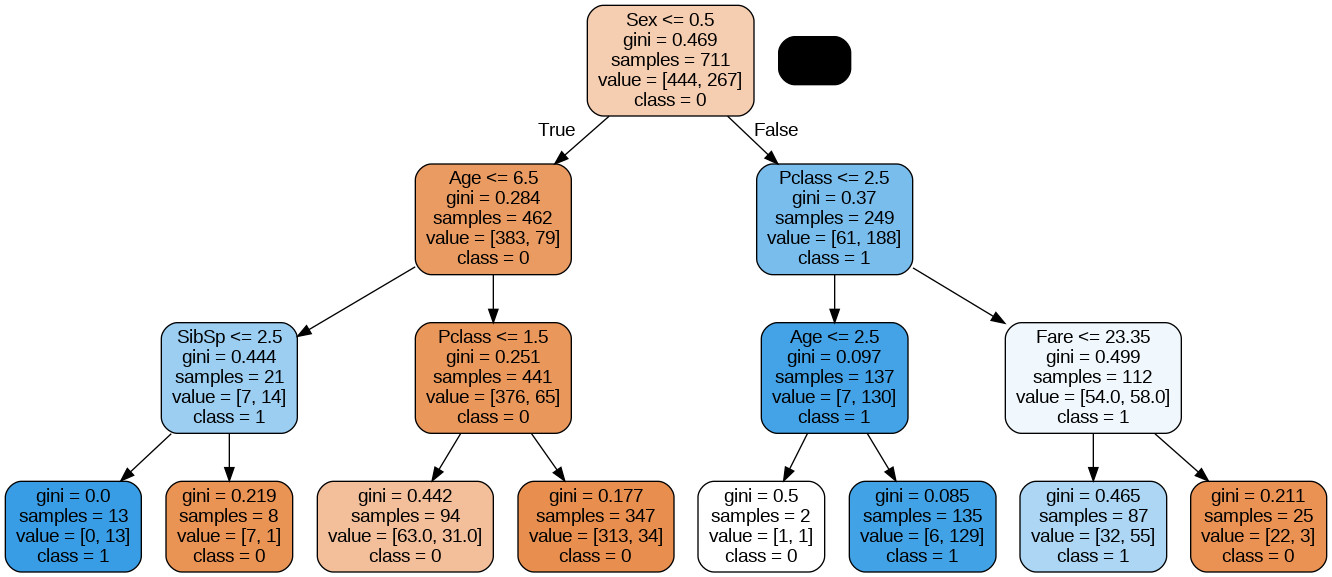

In [49]:
class_names = ['0', '1']

print("Arbol de Decisión Gini Depth 3")
graph = graph_tree(model=modelos['DT Gini Depth 3'], feature_names=x_features, class_names=class_names)
Image(graph.create_png())

Arbol de Decisión Entropy Depth 3


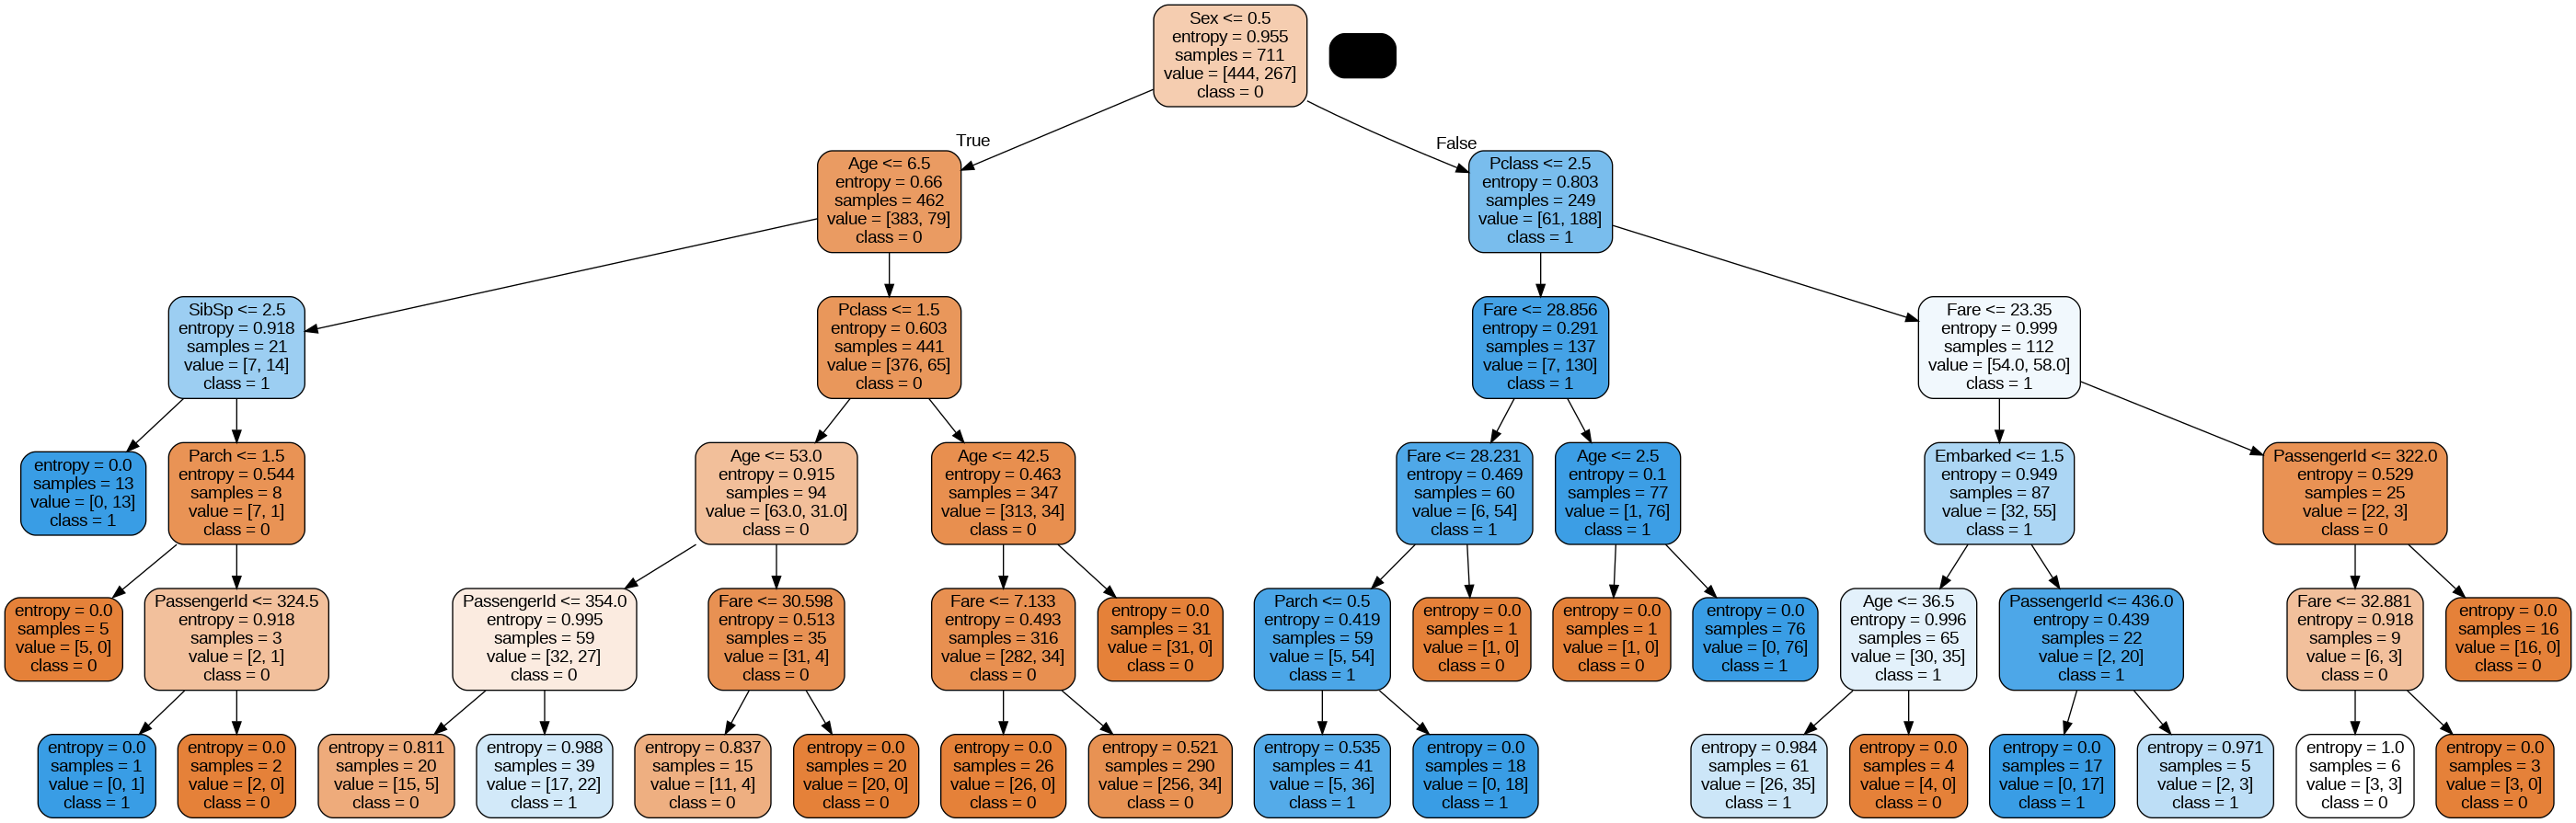

In [51]:
class_names = ['0', '1']

print("Arbol de Decisión Entropy Depth 3")
graph = graph_tree(model=modelos['DT Entropy Depth 5'], feature_names=x_features, class_names=class_names)
Image(graph.create_png())

##### **Evaluación de los modelos**

* Para cada uno de los modelos vamos a calcular las siguientes métricas de evaluación:

    + Accuracy
    + F1
    + Precision
    + Recall
    + AUC_ROC

In [52]:
from sklearn.metrics import confusion_matrix, accuracy_score, precision_score, recall_score, f1_score, roc_auc_score

evaluacion = list()
for k, v in modelos.items():
    print ('EVALUANDO MODELO: {model}'.format(model=k))
    model = {}
    model['name'] = k
    y_pred_train = v.predict(X_train)
    y_pred_test = v.predict(X_test)
    y_prob_train = v.predict_proba(X_train)
    y_prob_test = v.predict_proba(X_test)
    model['accuracy_train'] = accuracy_score(y_true=y_train, y_pred=y_pred_train)
    model['accuracy_tests'] = accuracy_score(y_true=y_test, y_pred=y_pred_test)
    model['precision_train'] = precision_score(y_true=y_train, y_pred=y_pred_train)
    model['precision_tests'] = precision_score(y_true=y_test, y_pred=y_pred_test)
    model['recall_train'] = recall_score(y_true=y_train, y_pred=y_pred_train)
    model['recall_tests'] = recall_score(y_true=y_test, y_pred=y_pred_test)
    model['f1_train'] = f1_score(y_true=y_train, y_pred=y_pred_train)
    model['f1_tests'] = f1_score(y_true=y_test, y_pred=y_pred_test)
    model['auc_roc_train'] = roc_auc_score(y_true=y_train, y_score=y_prob_train[:, 1])
    model['auc_roc_tests'] = roc_auc_score(y_true=y_test, y_score=y_prob_test[:, 1])
    evaluacion.append(model)

# Pasamos los resultados a un DataFrame para visualizarlos mejor
df = pd.DataFrame.from_dict(evaluacion)
df.set_index("name", inplace=True)
df

EVALUANDO MODELO: DT Gini Depth 3
EVALUANDO MODELO: DT Entropy Depth 5


,accuracy_train,accuracy_tests,precision_train,precision_tests,recall_train,recall_tests,f1_train,f1_tests,auc_roc_train,auc_roc_tests
name,,,,,,,,,,
DT Gini Depth 3,0.848101,0.741573,0.838298,0.714286,0.737828,0.616438,0.784861,0.661765,0.881386,0.792694
DT Entropy Depth 5,0.864979,0.758427,0.815498,0.708333,0.827715,0.698630,0.821561,0.703448,0.919822,0.743509


* Representamos las métricas para los diferentes modelos en un gráfico de barras:

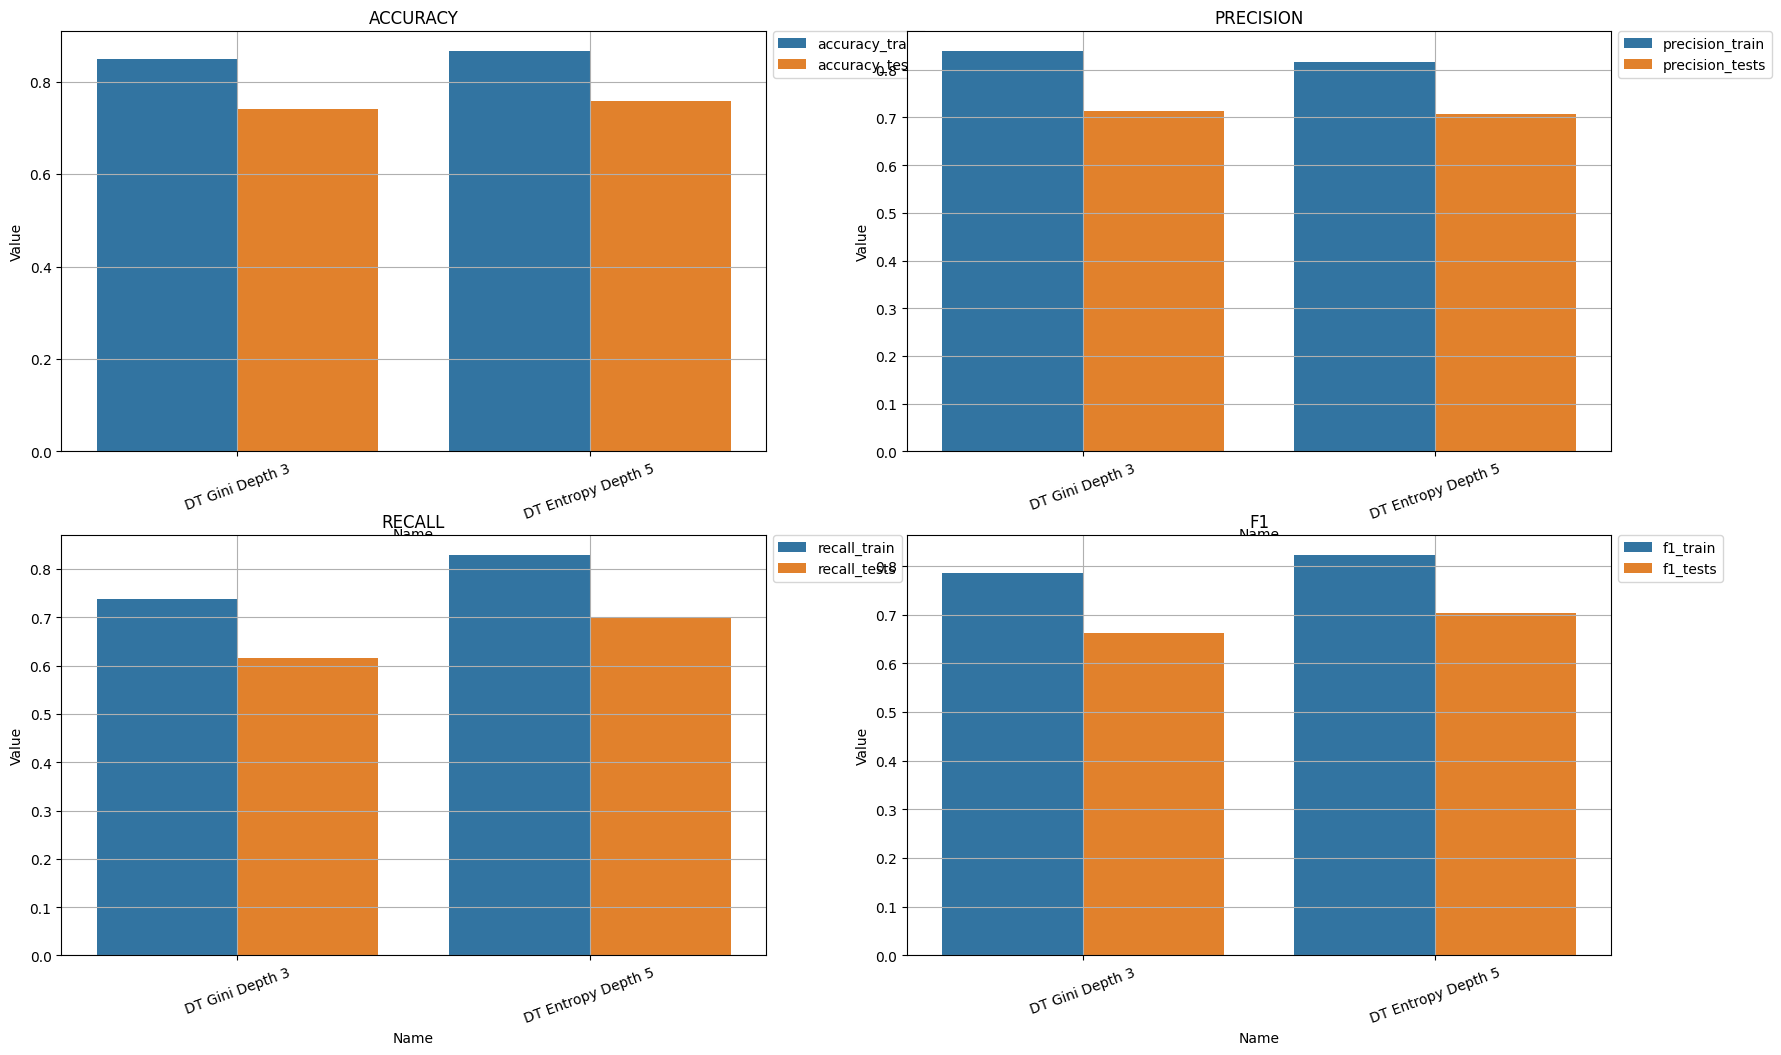

In [53]:
# Métricas a pintar
METRICS = ["accuracy", "precision", "recall", "f1"]

# Transformamos el dataframe para pintar las gráficas con seaborn
df_plot = df.reset_index().melt(id_vars='name').rename(columns=str.title)

plt.figure(figsize=(20, 12))
pos = 1
for metric in METRICS:
    # Filtramos la métrica a pintar
    df_aux = df_plot[df_plot['Variable'].str.contains(metric)]

    # Pintamos la gráfica en su posición 2x2
    plt.subplot(2, 2, pos)
    sns.barplot(x='Name', y='Value', hue='Variable', data=df_aux)
    plt.title(metric.upper())
    plt.grid()
    plt.legend(bbox_to_anchor=(1.01, 1), loc=2, borderaxespad=0.)
    plt.xticks(rotation=20)
    pos += 1
plt.show()

* A continuación vamos a mostrar las matrices de confusión para entrenamiento y test de cada uno de los modelos:

Obteniendo Matriz de Confusión de: DT Gini Depth 3
Obteniendo Matriz de Confusión de: DT Entropy Depth 5


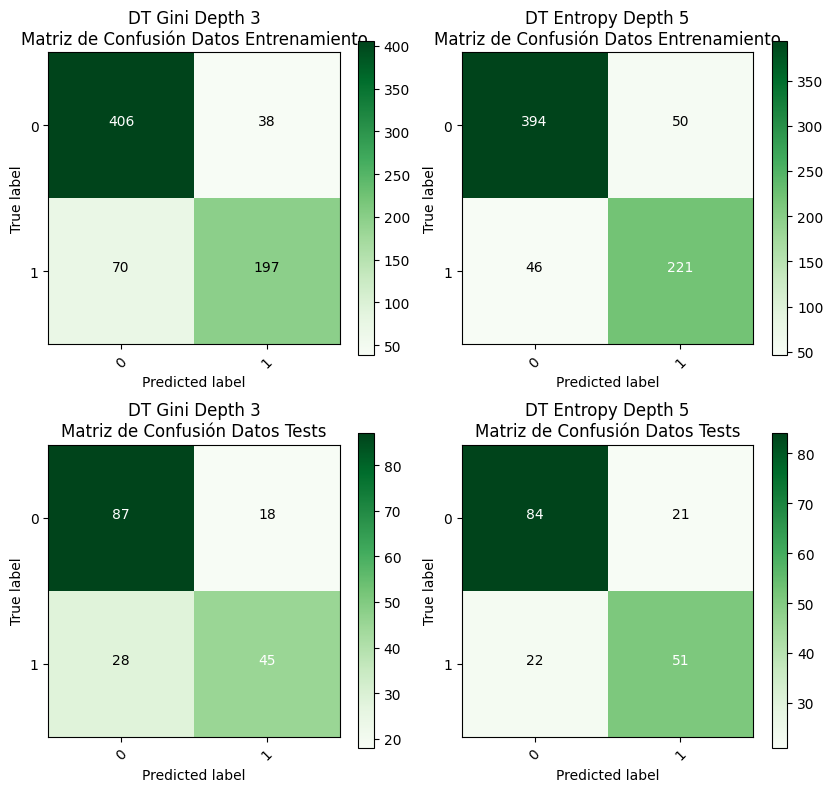

In [54]:
import numpy as np
import itertools

# Obtenemos las Matrices de confusión
msc = list()
for k, v in modelos.items():
    print ('Obteniendo Matriz de Confusión de: {model}'.format(model=k))
    model = {}
    model['name'] = k
    y_pred_train = v.predict(X_train)
    y_pred_test = v.predict(X_test)
    model['confusion_matrix_train'] = confusion_matrix(y_true=y_train, y_pred=y_pred_train)
    model['confusion_matrix_test'] = confusion_matrix(y_true=y_test, y_pred=y_pred_test)
    msc.append(model)

# Definimos el heatmap de la matriz de confusión
def plot_confusion_matrix(cm, classes, title, cmap=plt.cm.Greens):
    """
    This function prints and plots the confusion matrix.
    """
    plt.imshow(cm, interpolation='nearest', cmap=cmap)
    plt.title(title)
    plt.colorbar()
    tick_marks = np.arange(len(classes))
    plt.xticks(tick_marks, classes, rotation=45)
    plt.yticks(tick_marks, classes)

    thresh = cm.max() / 2.
    for i, j in itertools.product(range(cm.shape[0]), range(cm.shape[1])):
        plt.text(j, i, format(cm[i, j], 'd'), horizontalalignment="center",
                 color="white" if cm[i, j] > thresh else "black")

    plt.tight_layout()
    plt.ylabel('True label')
    plt.xlabel('Predicted label')


# Pintamos las matrices de confusión
plt.figure(figsize=(25, 8))
for i, mc in enumerate(msc):
    plt.subplot(2, 6, i+1)
    plot_confusion_matrix(mc['confusion_matrix_train'], classes=['0', '1'],
                          title='{}\nMatriz de Confusión Datos Entrenamiento'.format(mc['name']))
    plt.subplot(2, 6, i+7)
    plot_confusion_matrix(mc['confusion_matrix_test'], classes=['0', '1'],
                          title='{}\nMatriz de Confusión Datos Tests'.format(mc['name'] ))
plt.show()